In [1]:
import numpy as np
import illustris_python as il
import matplotlib.pyplot as plt
from shared.DTFE_utilities import DTFE

In [2]:
base_path = "/Users/users/nastase/PROJECT/"
snapnum = 135

In [3]:
dm_data = il.snapshot.loadSubset(base_path,snapnum,'dm',['Coordinates', 'Velocities'])
dm_pos_all = dm_data['Coordinates']
dm_vel_all = dm_data['Velocities']

In [4]:
x_filter = (dm_pos_all[:,0] >= 20000) & (dm_pos_all[:,0] <= 30000)
y_filter = (dm_pos_all[:,1] >= 20000) & (dm_pos_all[:,1] <= 30000)  
z_filter = (dm_pos_all[:,2] >= 20000) & (dm_pos_all[:,2] <= 30000)    
    
total_filter = x_filter& y_filter & z_filter
# total_filter = total_filter.reshape(-1)
    
dm_pos = dm_pos_all[total_filter].astype(np.float64)
dm_vel = dm_vel_all[total_filter].astype(np.float64)

In [5]:
mass = np.ones(len(dm_pos))

In [6]:
%%time
dtfe = DTFE(dm_pos, mass)

Delaunay Tesselation Field Estimator initialization:
	-Evaluate Delaunay tessellation
	-Evaluate density estimate
	-Evaluate gradients
CPU times: user 10.3 s, sys: 294 ms, total: 10.6 s
Wall time: 12 s


In [7]:
def densPlot(data, imageSize):
    X = np.arange(0, data.shape[0])
    Y = np.arange(0, data.shape[1])
    X, Y = np.meshgrid(X, Y)

    plt.figure(figsize=(imageSize, imageSize))
    plt.pcolormesh(X, Y, data, shading='auto')
    plt.axis("equal")
    plt.show()

In [8]:
L = 128
sigma = 8
gamma = 1

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


/var/lib/condor/execute/dir_6739/ipykernel_36638/3189670364.py:7: RuntimeWarning: invalid value encountered in log
  densPlot(np.log(dens), 10)


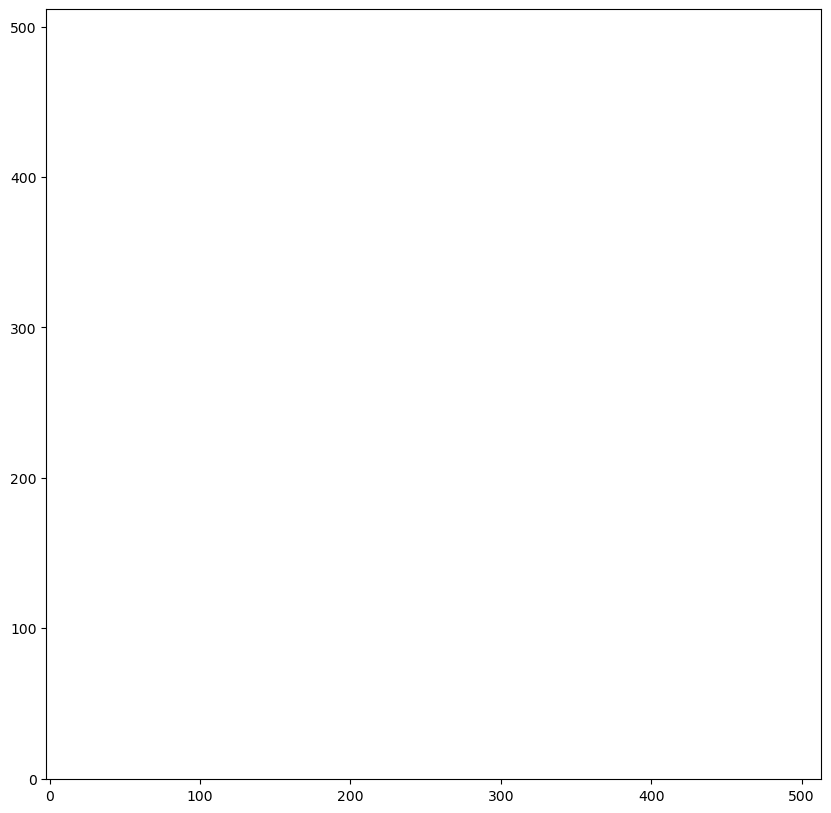

In [9]:
%time
n = int(4 * L)
X, Y = np.meshgrid(np.arange(0.1 * L, 0.9 * L, 0.8 * L / n),   
                   np.arange(0.1 * L, 0.9 * L, 0.8 * L / n))

dens  = dtfe.density(X.flat, Y.flat, np.full_like(X, int(L / 2)).flat).reshape((n,n))
densPlot(np.log(dens), 10)